## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [2]:
food = pd.read_csv("/content/food_data.csv")
food

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...
...,...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11,Breaded Pork Tenderloin Sandwich
4996,Year 3,Astronomy,Indiana State University,12,Ultimate Grilled Cheese Sandwich (with bacon a...
4997,Year 3,Chemistry,Butler University,13,Sugar Cream Pie
4998,Year 3,Astronomy,Butler University,15,Sugar Cream Pie


## Data Exploration

In [3]:
food.columns

Index(['Year', 'Major', 'University', 'Time', 'Order'], dtype='object')

The vast majority of students who order food are year 2 or 3.

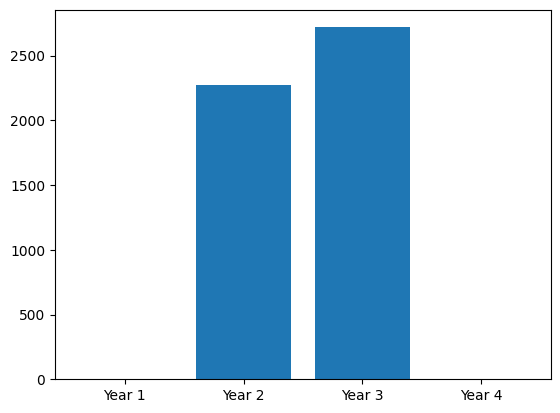

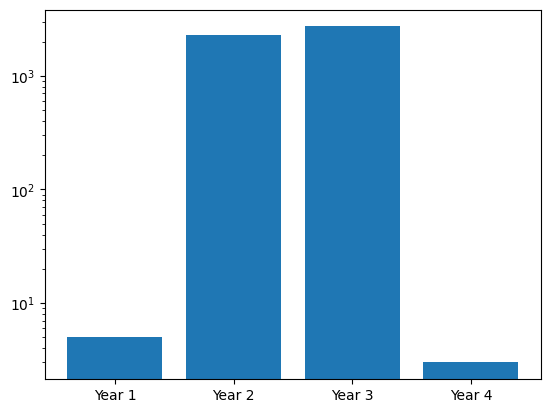

In [4]:
plt.bar(x=['Year 1', 'Year 2', 'Year 3', 'Year 4'],height=food["Year"].value_counts().loc[['Year 1', 'Year 2', 'Year 3', 'Year 4']])
plt.show()
plt.bar(x=['Year 1', 'Year 2', 'Year 3', 'Year 4'],height=food["Year"].value_counts().loc[['Year 1', 'Year 2', 'Year 3', 'Year 4']])
plt.yscale('log')
plt.show()

<Axes: >

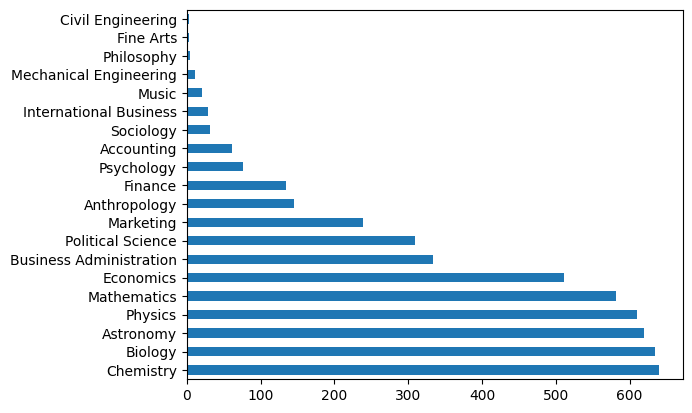

In [5]:
food["Major"].value_counts().plot.barh()

Some schools appear to not have that many students interested in a food truck.

<Axes: >

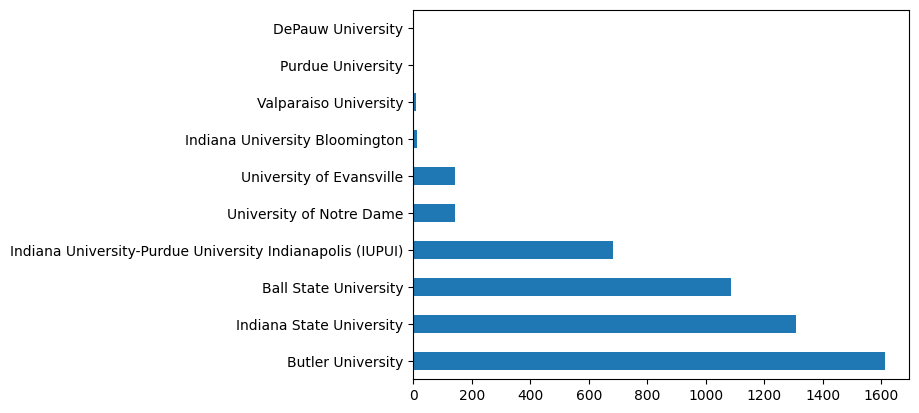

In [6]:
food["University"].value_counts().plot.barh()

Students primary order food during the lunch hours (noon-2PM), but traffic will start around 8AM and end around 6PM.

(array([   8.,   40.,  247.,  857., 1314., 1316.,  883.,  282.,   49.,
           4.]),
 array([ 7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <BarContainer object of 10 artists>)

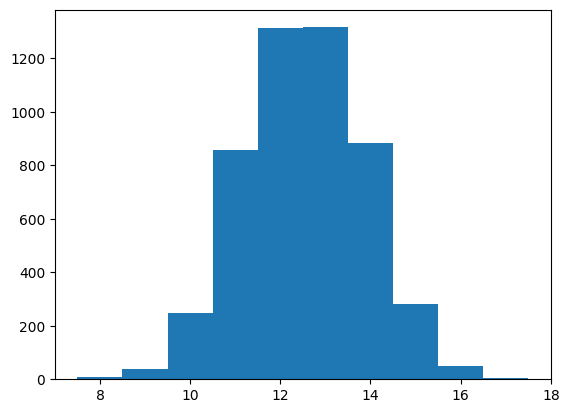

In [7]:
plt.hist(food["Time"], bins=max(food["Time"]) - min(food["Time"])+1, range = (min(food["Time"])-0.5, max(food["Time"])+0.5))

In total, across all schools, all menu items are all equally popular.

<Axes: >

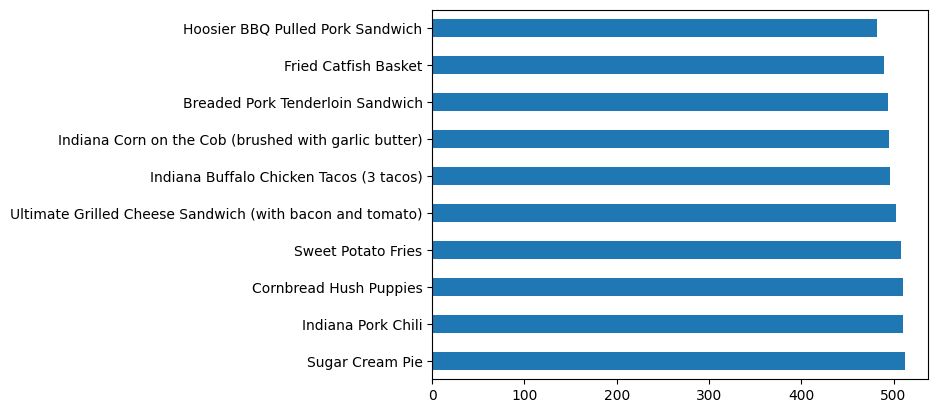

In [8]:
food["Order"].value_counts().plot.barh()

In [9]:
school_food_heatmap = pd.crosstab(food["University"], food["Order"])

However, the popular item at each school is not the same.
- Butler University and Ball State Ubiversity share 5 popular items
- ISU and IUPUI has the other 5 menu items
- Other schools have significantly lower ordering volume
- Only 1 student at Purdue has ordered food

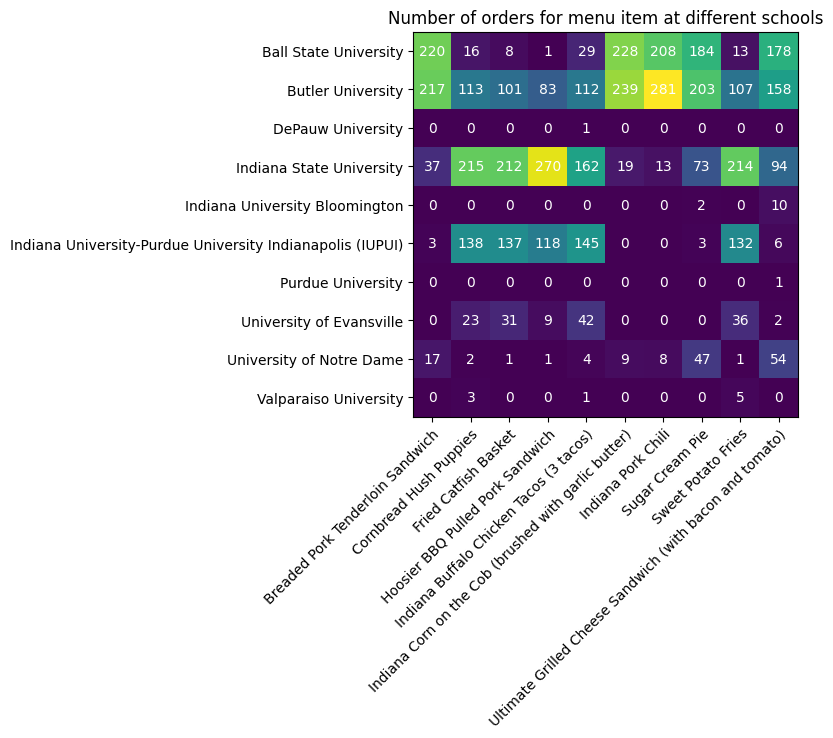

In [10]:
fig, ax = plt.subplots(figsize = (5,5))
im = ax.imshow(school_food_heatmap)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(school_food_heatmap.columns)), labels=school_food_heatmap.columns)
ax.set_yticks(np.arange(len(school_food_heatmap.index)), labels=school_food_heatmap.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(school_food_heatmap.index)):
    for j in range(len(school_food_heatmap.columns)):
        text = ax.text(j, i, school_food_heatmap.iloc[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Number of orders for menu item at different schools")
plt.show()

In [11]:
major_food_heatmap = pd.crosstab(food["Major"], food["Order"])

The interest of students also differ by major.
- Physics majors seem to like everything
- Accounting, Astronomy, Business Administration, Marketing and Mathematics students like 5 of the 10 menu items
- Anthropology, Biology, Chemistry, Economics, Political Science and Psychology students like the other 5 items.

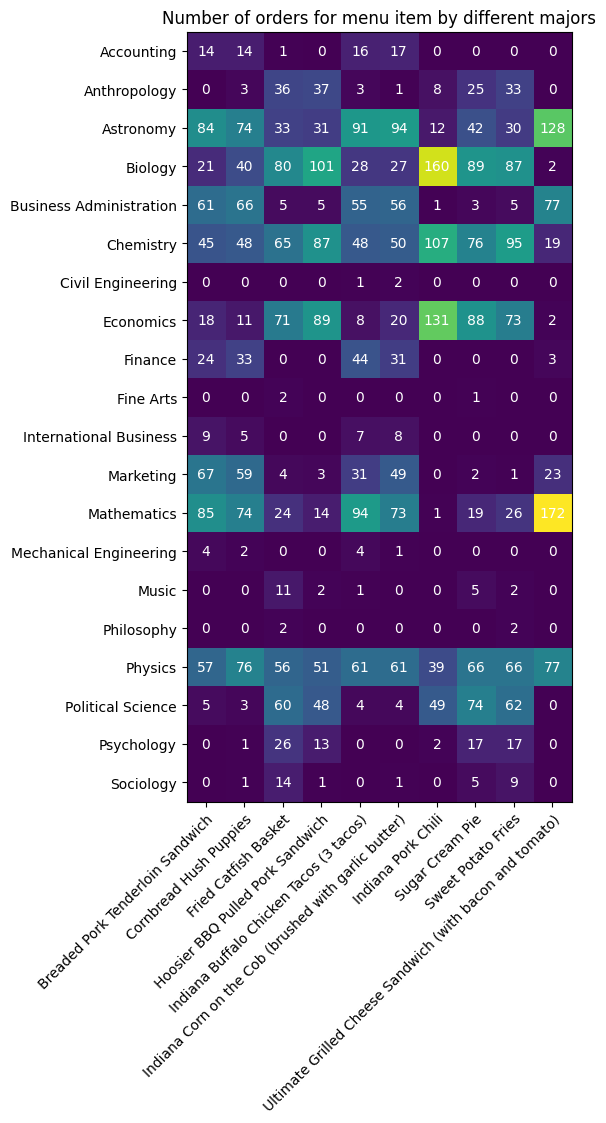

In [12]:
fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(major_food_heatmap)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(major_food_heatmap.columns)), labels=major_food_heatmap.columns)
ax.set_yticks(np.arange(len(major_food_heatmap.index)), labels=major_food_heatmap.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(major_food_heatmap.index)):
    for j in range(len(major_food_heatmap.columns)):
        text = ax.text(j, i, major_food_heatmap.iloc[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Number of orders for menu item by different majors")
plt.show()

# Implications of Data

## Business Outcomes

1. Knowing the distribution of popular items, trucks destined for different campuses can stock the more popular items for a that campus, making it less likely to run out of popular items and potentially making more sales. Periodic re-analysis are needed to see if the trend is changing.
2. While not exhibited by this dataset, if there are items making significant more or significantly less sales, the data can be used to decide what the company should stock.
3. Will customers appreciate the algorithm in the long term? Is it possible that they'll not appreciate the prediction being too accurate and stop using the app?
4. "Incorrect" recommendations can make the customer dissatisfied.

## Data Ethics:

1. For an ordering app, the data collection process is potentially intrusive.
2. Some data we collect will require permission of students to be collected. For our particular dataset, it would be what major they are.
3. Since this data does not track individuals, it may be impossible to know if the dataset is representative of the entire student population. That is to say, while this may work well for many students, it might not work at all for others.

## Technical Implications

1. While the data is not sensitive, it still needs to be secured out of respect for the customer, and also out of the interest of the business.
2. How is the data collected? Is there an existing platform to continue providing new data to keep the system up to date?
3. Should data be continuously collected to keep the model up to date? Examples include date and day of the week.
4. Should additional data be collected to reduce the amount of bias overall? One example is ethnicity, as it may imply a different culture, and therefore differing choices from people of other ethnicities.

# Model Training

In [13]:
x = pd.get_dummies(food.drop('Order', axis=1))

In [14]:
y = food["Order"]

We explore the performance of different classifiers:

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

# ---------------------------------------------------
knn = KNeighborsClassifier(n_neighbors = 16)
# ---------------------------------------------------
knn_steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors = 16))]
knn_scaled = Pipeline(knn_steps)
# ---------------------------------------------------
tree = DecisionTreeClassifier()
# ---------------------------------------------------
tree_steps = [('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier())]
tree_scaled = Pipeline(tree_steps)
# ---------------------------------------------------
etree = ExtraTreeClassifier()
# ---------------------------------------------------
etree_steps = [('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier())]
etree_scaled = Pipeline(tree_steps)
# ---------------------------------------------------
logreg = LogisticRegression(max_iter=200)
# ---------------------------------------------------
logreg_steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=200))]
logreg_scaled = Pipeline(logreg_steps)

In [16]:
def print_array_result(clfr,x,y,cv,name):
  result = cross_val_score(clfr, x, y, cv=cv)
  print(f"======================================================================================\nThe {name} classifier with {cv}-fold cross validation produced the following accuracies:\nMean: {np.mean(result):.4}\nStandard Deviation: {np.std(result):.4}\nMinimum: {np.min(result):.4}\nMaximum: {np.max(result):.4}")

In [17]:
print_array_result(knn,x,y,2,"K nearest neighbors")
print_array_result(knn,x,y,5,"K nearest neighbors")
print_array_result(knn,x,y,25,"K nearest neighbors")
print("\n\n\n")
print_array_result(knn_scaled,x,y,2,"K nearest neighbors with scaling")
print_array_result(knn_scaled,x,y,5,"K nearest neighbors with scaling")
print_array_result(knn_scaled,x,y,25,"K nearest neighbors with scaling")
print("\n\n\n")
print_array_result(tree,x,y,2,"decision tree")
print_array_result(tree,x,y,5,"decision tree")
print_array_result(tree,x,y,25,"decision tree")
print("\n\n\n")
print_array_result(tree_scaled,x,y,2,"decision tree with scaling")
print_array_result(tree_scaled,x,y,5,"decision tree with scaling")
print_array_result(tree_scaled,x,y,25,"decision tree with scaling")
print("\n\n\n")
print_array_result(etree,x,y,2,"extra tree classifier")
print_array_result(etree,x,y,5,"extra tree classifier")
print_array_result(etree,x,y,25,"extra tree classifier")
print("\n\n\n")
print_array_result(etree_scaled,x,y,2,"extra tree classifier with scaling")
print_array_result(etree_scaled,x,y,5,"extra tree classifier with scaling")
print_array_result(etree_scaled,x,y,25,"extra tree classifier with scaling")
print("\n\n\n")
print_array_result(logreg,x,y,2,"logistic regression")
print_array_result(logreg,x,y,5,"logistic regression")
print_array_result(logreg,x,y,25,"logistic regression")
print("\n\n\n")
print_array_result(logreg_scaled,x,y,2,"logistic regression with scaling")
print_array_result(logreg_scaled,x,y,5,"logistic regression with scaling")
print_array_result(logreg_scaled,x,y,25,"logistic regression with scaling")

The K nearest neighbors classifier with 2-fold cross validation produced the following accuracies:
Mean: 0.6144
Standard Deviation: 0.0044
Minimum: 0.61
Maximum: 0.6188
The K nearest neighbors classifier with 5-fold cross validation produced the following accuracies:
Mean: 0.6254
Standard Deviation: 0.0134
Minimum: 0.6
Maximum: 0.639
The K nearest neighbors classifier with 25-fold cross validation produced the following accuracies:
Mean: 0.6326
Standard Deviation: 0.03617
Minimum: 0.55
Maximum: 0.68




The K nearest neighbors with scaling classifier with 2-fold cross validation produced the following accuracies:
Mean: 0.5794
Standard Deviation: 0.0078
Minimum: 0.5716
Maximum: 0.5872
The K nearest neighbors with scaling classifier with 5-fold cross validation produced the following accuracies:
Mean: 0.6224
Standard Deviation: 0.01993
Minimum: 0.589
Maximum: 0.642
The K nearest neighbors with scaling classifier with 25-fold cross validation produced the following accuracies:
Mean: 0.626

All algorithms are ~60% accurate.

Because of a large amount of data is available, decision trees appear to take advantage and fine tune their rules, achieving the best performance:
- 62% in 2-fold cross validation
- 65% in 5-fold cross validation
- 66% in 25-fold cross validation

This particular model has been saved as "extra_tree.model"

Considering that the random guess would yield a 10% accuracy, the models are fairly suitable. However, biases for different parameters are not analyzed, so the model may differ in performance depending on the school, time, and so on.

Applying normalization on the data appears to have a minumal effect on the training outcome, and in the case or KNN, regressed in performance.

# Save & Verify Model

In [18]:
from joblib import dump, load
dump(etree, '/content/extra_tree.model')

['/content/extra_tree.model']

In [19]:
etree_verify = load('/content/extra_tree.model')

In [20]:
print_array_result(etree_verify,x,y,2,"extra tree classifier")
print_array_result(etree_verify,x,y,5,"extra tree classifier")
print_array_result(etree_verify,x,y,25,"extra tree classifier")

The extra tree classifier classifier with 2-fold cross validation produced the following accuracies:
Mean: 0.6208
Standard Deviation: 0.0068
Minimum: 0.614
Maximum: 0.6276
The extra tree classifier classifier with 5-fold cross validation produced the following accuracies:
Mean: 0.6508
Standard Deviation: 0.009887
Minimum: 0.641
Maximum: 0.667
The extra tree classifier classifier with 25-fold cross validation produced the following accuracies:
Mean: 0.6568
Standard Deviation: 0.03487
Minimum: 0.575
Maximum: 0.725


# Moving Forward

Depending on the desired level of accuracy of prediction given the data, it may be necessary to use a more advanced machine learning algorithms.

If 60% accuracy is sufficient, it can be achieved by using the existing model, but additional work are still needed to see what its biases and limitations are before it can be concluded mature.

If a significantly higher accuracy is required, exploring more complex machine learning models such as deep learning may be considered. There are some drawbacks to this approach:

- Resource Requirements: Advanced models likely demands more computational resources, potentially affecting customers' devices or the company servers.

- Data Availability: More complex models may need a more complex dataset to train effectively, and data quality would be an additional concern for the expanded dataset.

- Interpretability: The results of deep learning models may be non-categorical and harder to interpret and use for the program.

- Validation Effort: The validation process for advanced models can be more extensive and take longer.

In addition, when making the decisions, it is equally important to analyze technical aspects as the practical implications and potential business impact.